#                          World Happiness Report

###  Context

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.


The columns succeeding the Happiness Score: 

GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.

The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import power_transform
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [31]:
df=pd.read_csv('https://raw.githubusercontent.com/ravivarma95/Practice-ML-projects-/main/Practice%20Data%20sets/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


####Observations :

158 rows and 12 columns in total

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [4]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

#### Observations :

- No missing values in Data set and there is no mixed data types in single column.
 

In [43]:
df1 = df.drop(columns = ['Country', 'Region','Happiness Rank','Happiness Score'])

In [33]:
df1

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...
153,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [34]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


C:\Users\Ravi Varma Landeri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ravi Varma Landeri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Ravi Varma Landeri\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar 

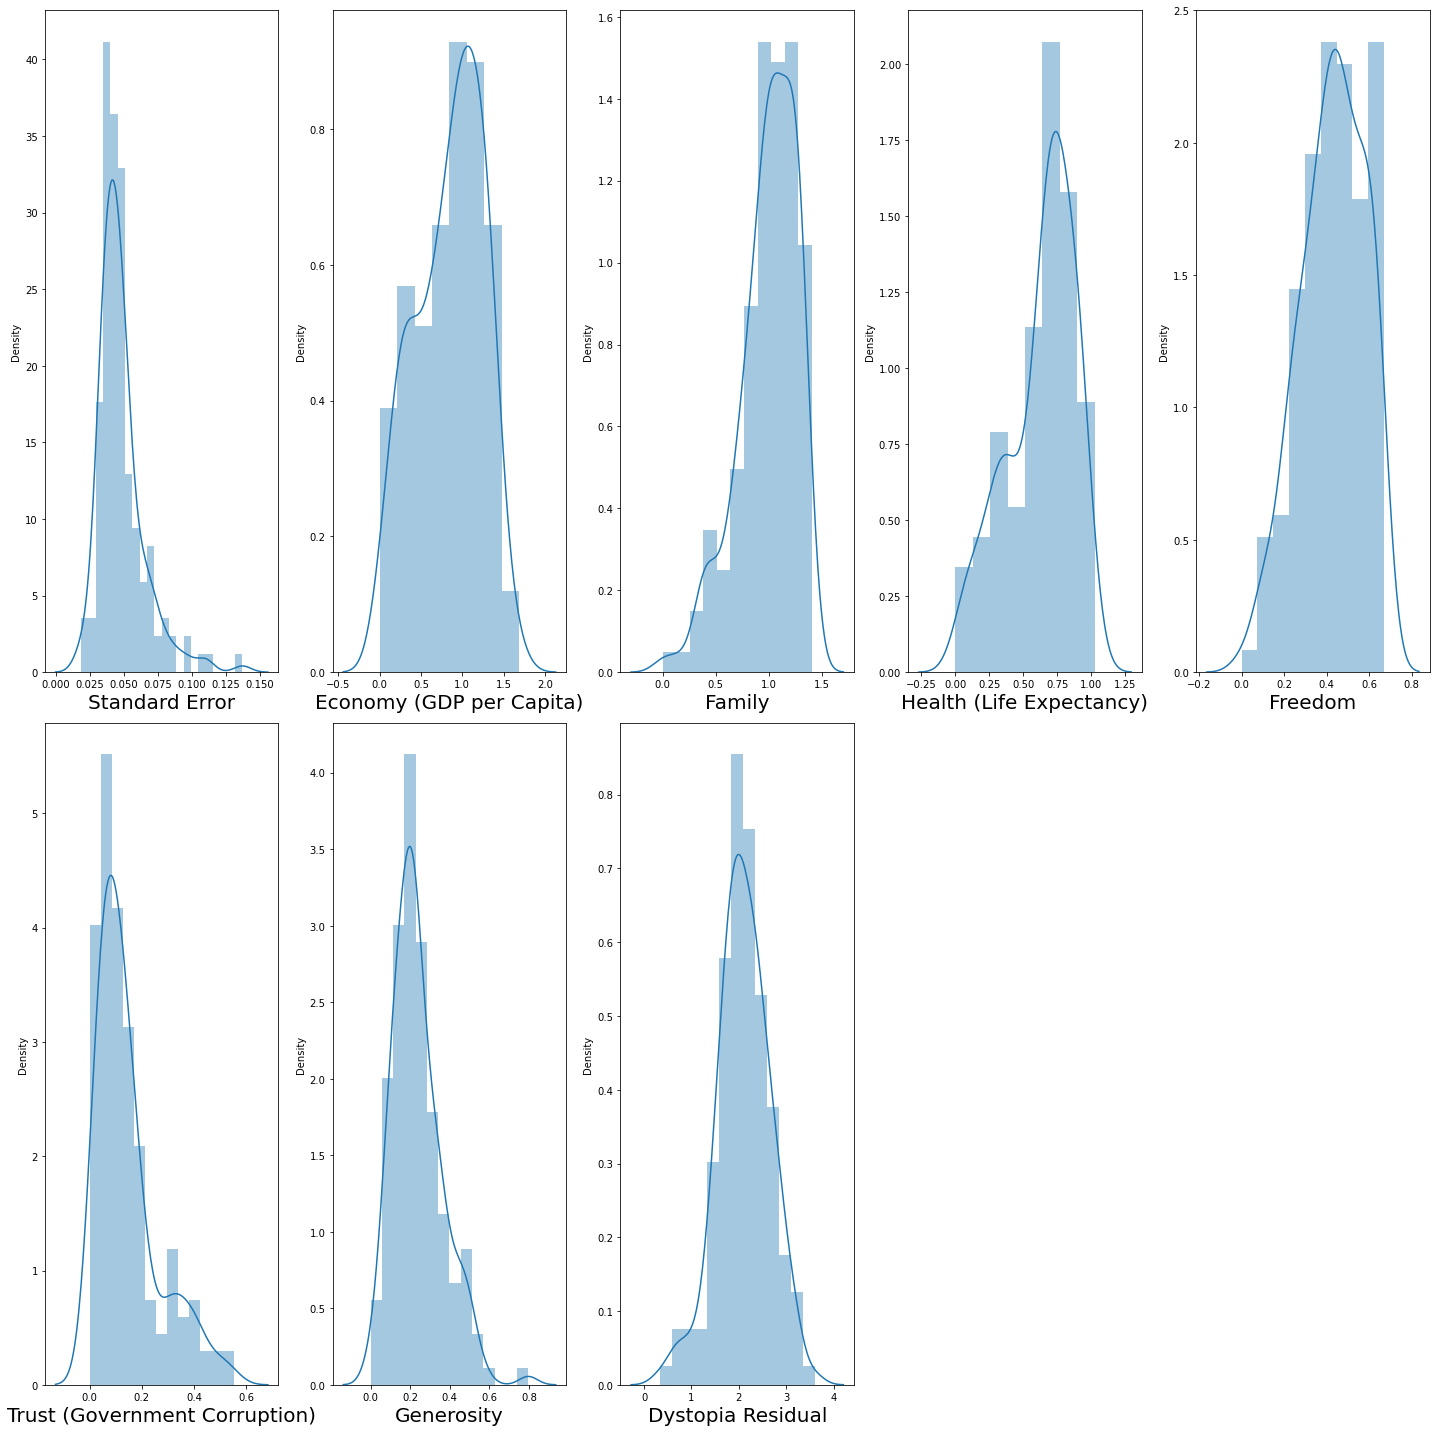

In [44]:
plt.figure(figsize = (20,20), facecolor= 'white')
plotnumber = 1

for column in df1 :
    if plotnumber <= 10 :
        ax = plt.subplot(2,5,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel (column, fontsize =20)
    plotnumber +=1
plt.tight_layout()
plt.show()

In [35]:
df.sort_values(by="Happiness Rank", ascending=True).head(10)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


### Scatter plots camparision of happiness score with other variables.

Obtain scatter plots of the Happiness Score versus with each of the other variables in df


C:\Users\Ravi Varma Landeri\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


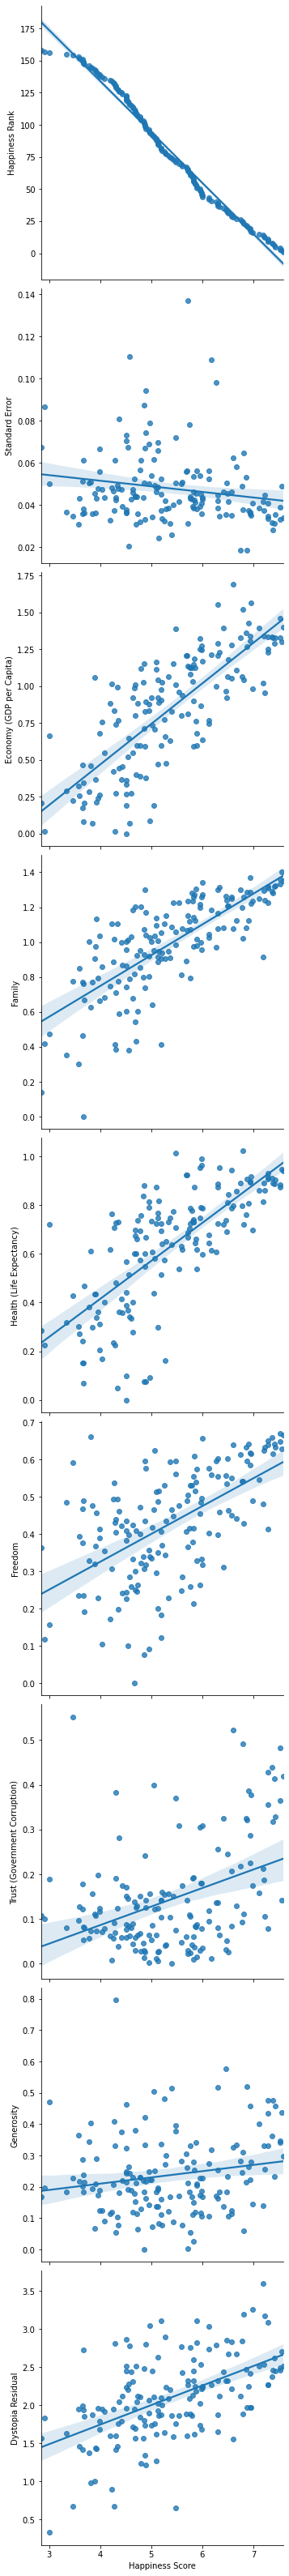

In [36]:
sns.pairplot(data=df, kind='reg', size = 5,
                  x_vars=['Happiness Score'],
                  y_vars=['Happiness Rank','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])

In [ ]:
### Scatter plots camparision of happiness score with other variables by region with diffrent colours

C:\Users\Ravi Varma Landeri\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


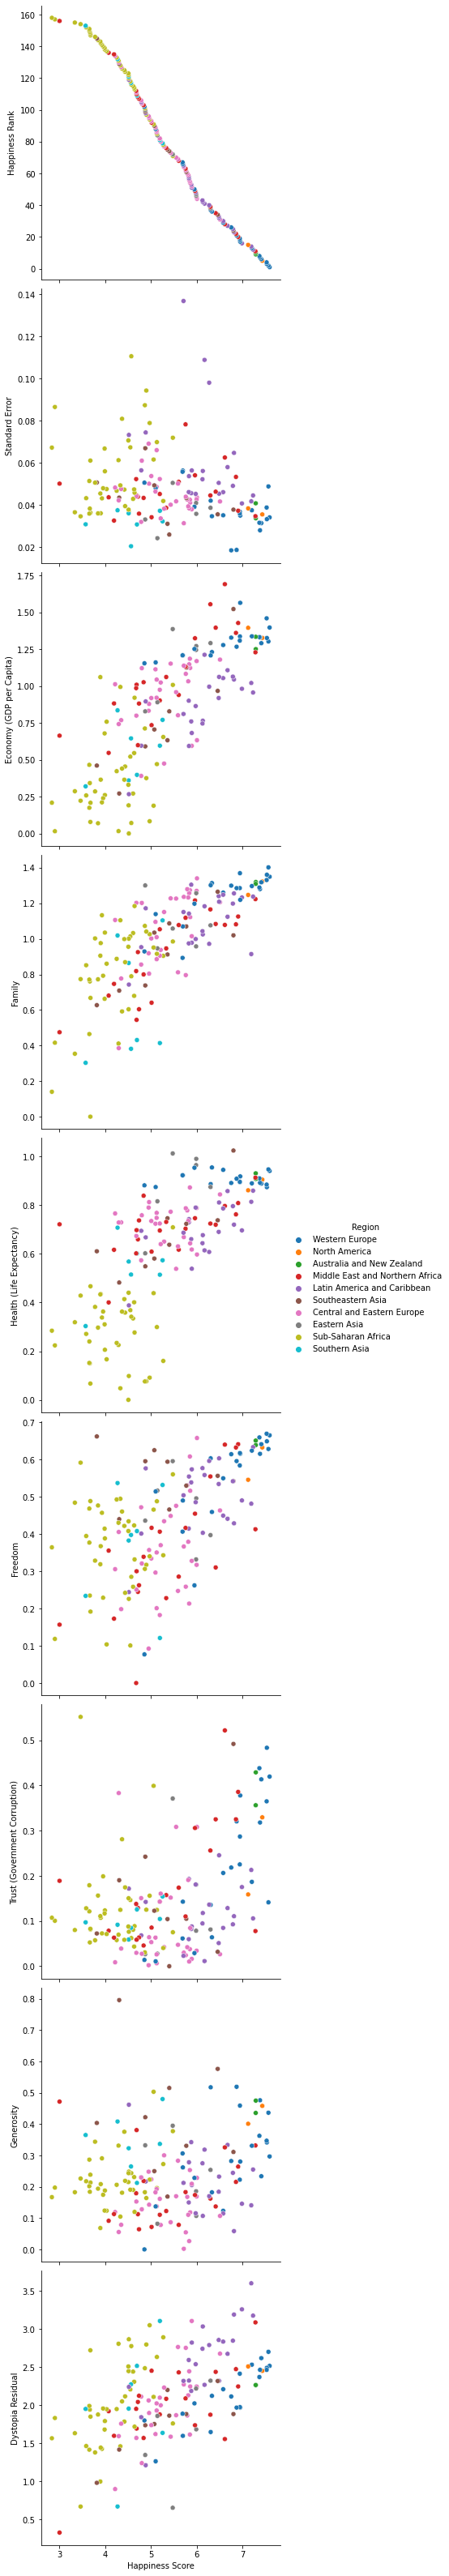

In [23]:
sns.pairplot(data=df, size = 5, hue='Region',
                  x_vars=['Happiness Score'],
                  y_vars=['Happiness Rank','Standard Error','Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity','Dystopia Residual'])

#### Except happiness rank and standard error all variables have positive corelation with happiness score.

Let us check the strength of corelation between happiness score and other variables.

In [24]:
df.corr(method="pearson", min_periods=20)["Happiness Score"].sort_values(ascending=False)

Happiness Score                  1.000000
Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64

Economy, Family & Health have strong corelatiomn with happiness score which is above 0.7

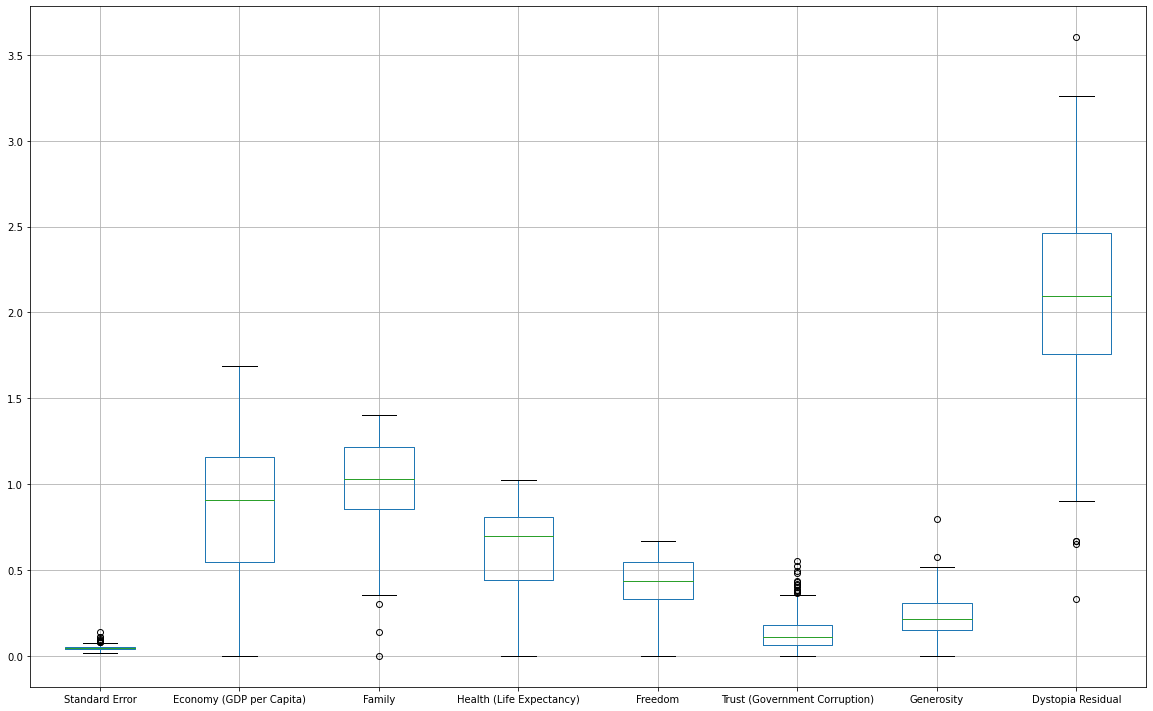

In [45]:
df1.boxplot(figsize=(20,15))
plt.subplots_adjust(bottom=0.25)
plt.show()

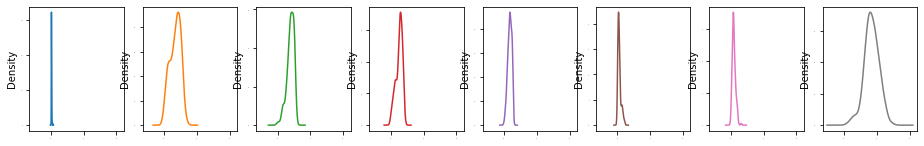

In [51]:
df1.plot(kind='density',subplots=True, layout=(6,11),fontsize=1,figsize=(22,16),legend=False)
plt.show()

In [55]:
df1=pd.DataFrame(power_transform(df1),columns=df1.columns)
df1.skew()

Standard Error                  -0.020092
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Trust (Government Corruption)    0.185965
Generosity                       0.013320
Dystopia Residual                0.022925
dtype: float64

In [57]:
x=df1
y=df["Happiness Score"]

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=50,random_state=12)

## Application of Linear Regressor on data set

In [63]:

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [61]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)

In [62]:
lm.score(x_train,y_train)

0.9913040999812984

In [64]:
print("mean_squared_error:",mean_squared_error(y_test,pred))
print("mean_absolute_error",mean_absolute_error(y_test,pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,pred)))

mean_squared_error: 0.009025406221428315
mean_absolute_error 0.07871551689373142
sqrt_mean_squared_error 0.09500213798345969


In [65]:
print("r2_score",r2_score(y_test,pred))

r2_score 0.9926978706014504


In [66]:
laso=Lasso(alpha=0.001)
laso.fit(x_train,y_train)
laso.score(x_train,y_train)

0.9913010288495796

In [67]:
rg=Ridge()
rg.fit(x_train,y_train)
rg.score(x_train,y_train)

0.9912665711694519

## Application of KNN Regressor on data set

In [81]:
knn= KNeighborsRegressor()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.9235103980139886

### Let us check R2 score between Predicted test values and actiual test values.

In [84]:
y_test_pred = knn.predict(x_test)
y_test_pred

array([5.12644444, 4.04411111, 6.15355556, 4.17588889, 6.66888889,
       7.21322222, 4.09833333, 4.39377778, 4.94211111, 4.80222222,
       5.07055556, 5.21133333, 4.00544444, 5.47466667, 4.39333333,
       4.82955556, 7.30544444, 6.69088889, 4.98311111, 5.40644444,
       5.85733333, 4.899     , 5.41277778, 6.29011111, 7.30566667,
       7.34044444, 5.39322222, 7.23022222, 4.12155556, 4.66022222,
       5.813     , 6.60911111, 6.23722222, 6.29933333, 4.53966667,
       5.44422222, 4.07311111, 7.27766667, 4.75511111, 4.916     ,
       5.88144444, 5.39744444, 6.29311111, 4.78955556, 5.38144444,
       7.13588889, 6.18933333, 5.82388889, 5.46533333, 6.13011111])

In [86]:
r2_score(y_test,y_test_pred)

0.8771865546717192

In [88]:
print("mean_squared_error:",mean_squared_error(y_test,y_test_pred))
print("mean_absolute_error",mean_absolute_error(y_test,y_test_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,y_test_pred)))

mean_squared_error: 0.15179698592592594
mean_absolute_error 0.3253533333333333
sqrt_mean_squared_error 0.3896113267423394


### Finding best K value for Knn model

In [114]:
errors =[]
best_rmse_val = 0

for i in range(1,31):
    model = KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    
    if error > best_rmse_val:
        best_rmse_val = error
        best_Kvalue = i
    

In [111]:
best_rmse_val

0.5176234345545032

In [112]:
best_Kvalue

1

In [118]:
Knn_mode  = KNeighborsRegressor(n_neighbors=1)
Knn_mode.fit(x_train,y_train)
Knn_mode.score(x_train,y_train)

1.0

In [120]:
Y_Test_Pred = Knn_mode.predict(x_test)

In [121]:
r2_score(y_test,Y_Test_Pred)

0.7832242852772192

## Application of RandomForest Regressor on data set

In [126]:
RF= RandomForestRegressor()
RF.fit(x_train,y_train)
RF.score(x_train,y_train)

0.9838606585629716

In [ ]:
### Let us check R2 score between Predicted test values and actiual test values.

In [128]:
RF_pred = RF.predict(x_test)
r2_score(y_test,RF_pred)

0.8725216905650367

In [131]:
parameters = {"n_estimators":[100,200,300,400,500,600,700,800,900,1000],"criterion":["mse","mae"]
              ,"max_depth":[3,4,5,6,7,8,10,25,27],"min_samples_split":[2,5,8,10,12,18,20,24],
             "max_features":['auto','sqrt'],"min_samples_leaf":[1,3,5,6,7,8,9]}

rdm_RF= RandomizedSearchCV(RF,param_distributions=parameters,n_iter=30,n_jobs=-1,cv=8,verbose=2)

rdm_RF.fit(x_train,y_train)

Fitting 8 folds for each of 30 candidates, totalling 240 fits


RandomizedSearchCV(cv=8, estimator=RandomForestRegressor(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 25,
                                                      27],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 6, 7, 8,
                                                             9],
                                        'min_samples_split': [2, 5, 8, 10, 12,
                                                              18, 20, 24],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   verbose=2)

In [132]:
rdm_RF.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=25)

### RandomForest Regressor model validation.

In [133]:
rdm_RF.best_score_

0.849325700714004

In [134]:
rdm_RF_pred = rdm_RF.predict(x_test)

In [135]:
r2_score(y_test,rdm_RF_pred)

0.8838653663432636

In [136]:
print("mean_squared_error:",mean_squared_error(y_test,rdm_RF_pred))
print("mean_absolute_error",mean_absolute_error(y_test,rdm_RF_pred))
print("sqrt_mean_squared_error",sqrt(mean_squared_error(y_test,rdm_RF_pred)))

mean_squared_error: 0.1435419982200003
mean_absolute_error 0.29997440000000003
sqrt_mean_squared_error 0.3788693682788308


## Conclusion 

In [ ]:
Up on applying diffrent mechine learning algorythms. Linear regression modem giving best accuracy & R2 socre. 
Hence its best to use Linear regression model for prediction.

# Saving best model using Pickle.

In [138]:
import joblib
joblib.dump(lm,"World_Happiness_Report_project.pkl")

['World_Happiness_Report_project.pkl']

## Used saved model for future prediction. 

In [146]:
model=joblib.load("World_Happiness_project.pkl")

prediction=model.predict(df1.iloc[[4]])
prediction

array([7.48465659])

In [147]:
prediction=model.predict(df1.iloc[[0]])
prediction

array([7.68565768])